# **基于Tf-keras的分类模型**

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os, sys, time
import tensorflow as tf
from tensorflow import keras

## **加载数据集**

我们使用**fashion-mnist**数据集

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_all, y_train_all), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_all[:5000], X_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(55000, 28, 28) (55000,) (5000, 28, 28) (5000,)


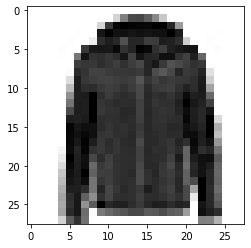

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary") # 黑白图片使用二值显示
    plt.show()
show_single_image(X_train[0])

In [5]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.4)) # 缩放的大小
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            # 插入一个子图
            plt.subplot(n_rows, n_cols, index+1) 
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest') # nearest表示缩放的差值方式
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

In [6]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']

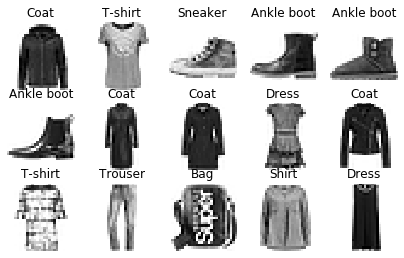

In [7]:
show_imgs(3, 5, X_train, y_train, class_names)

## **模型搭建**Sequential

In [8]:
# tf.keras.models.Sequential
model = keras.models.Sequential()

# 添加层
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
# Sequential可以接受一个*args参数
# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

**sparse_categorical_crossentrogy和categorical_crossentrogy**
 - 前者:y_true为index集合， y_pred为模型输出
 - 后者:y_true为one-hot

In [9]:
model.layers

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
# fit
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 137us/sample - loss: 2.4226 - accuracy: 0.7547 - val_loss: 0.5948 - val_accuracy: 0.7927
Epoch 2/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.5064 - accuracy: 0.8255 - val_loss: 0.5306 - val_accuracy: 0.8095
Epoch 3/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4443 - accuracy: 0.8430 - val_loss: 0.4989 - val_accuracy: 0.8159
Epoch 4/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.4214 - accuracy: 0.8476 - val_loss: 0.4611 - val_accuracy: 0.8383
Epoch 5/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.4090 - accuracy: 0.8558 - val_loss: 0.4383 - val_accuracy: 0.8511
Epoch 6/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.3843 - accuracy: 0.8635 - val_loss: 0.4412 - val_accuracy: 0.8460
Epoch 7/10
55000/55000 [==========================

In [12]:
history.history

{'loss': [2.4226122916741804,
  0.5064006221381101,
  0.44427480134963987,
  0.42138740528713575,
  0.4089940088618885,
  0.38428942436630076,
  0.3770486889665777,
  0.3590916159694845,
  0.3583394536798651,
  0.34570516925941813],
 'accuracy': [0.7546545,
  0.8254909,
  0.84303635,
  0.84761816,
  0.8557818,
  0.8634909,
  0.8681818,
  0.8726182,
  0.8741091,
  0.87881815],
 'val_loss': [0.5947916078567504,
  0.530583068037033,
  0.4989286795139313,
  0.46109743280410764,
  0.4382593742132187,
  0.4412367705106735,
  0.40637031795978545,
  0.4174714236021042,
  0.4050936306238174,
  0.40620366230010985],
 'val_accuracy': [0.7927,
  0.8095,
  0.8159,
  0.8383,
  0.8511,
  0.846,
  0.8592,
  0.8577,
  0.8675,
  0.8614]}

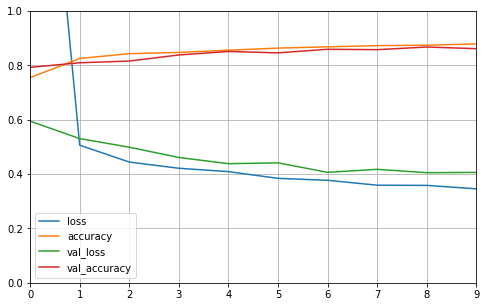

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True) # 显示网格
    plt.gca().set_ylim(0, 1) # 控制显示范围
    plt.show()
    
plot_learning_curves(history)